[Source kernel](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb)

# Set up

Note for changes in Keras 2. Refer to this [forum](http://forums.fast.ai/t/keras-2-released/1956/22).

Keras 1 -> Keras 2:

**Keras 1:**

In [1]:
#1 from keras.layers.convolutional import Convolution2D
#2 from keras.regularizers import l2, activity_l2, l1, activity_l1
#3 from keras.utils.layer_utils import layer_from_config
#4 from keras import backend
#5 Convolution2D
#6 batches.nb_sample
#7 batches.nb_class
#8 model.add(Convolution2D(filters, 3, 3, activation="relu"))
#9 fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#10 nb_epoch
#11 self.model.predict_generator(test_batches, test_batches.nb_sample)

**Keras 2**

In [2]:
#1 from keras.layers.convolutional import Conv2D
#2 from keras.regularizers import l2, l1
#3 from keras.layers import deserialize as layer_from_config
#4 from keras import backend; backend.set_image_dim_ordering('th')
#5 Conv2D
#6 batches.samples
#7 batches.num_class
#8 model.add(Conv2D(filters, (3, 3), activation="relu"))
#9 fit_generator(batches, steps_per_epoch=batches.samples//batches.batch_size, epochs=nb_epoch, validation_steps=val_batches.samples//val_batches.batch_size)
#10 epochs
#11 self.model.predict_generator(test_batches, test_batches.samples//test_batches.batch_size)

In [5]:
#from __future__ import division,print_function
import os, json, sys, argparse
from glob import glob
import shutil, distutils
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
args = {
#    'current_dir': os.getcwd(),
    'LESSON_HOME_DIR': os.getcwd(),
    'DATA_HOME_DIR': '../dogs_vs_cats/data/',
    'intermediate_dir': '../dogs_vs_cats/intermediate/',
    'batch_size': 16,
    'nb_vals': 0.3,
    'seed':7,
}

args = argparse.Namespace(**args)

```
fast-ai
│ README.md
|
|--- lessons: code of each lesson 
│   │   lesson1.ipynb
|   |   lesson2.ipynb
│   │   lesson3.ipynb
| 
|--- dogs_vs_cats
|   │   data: original data
|   |   |--- train
|   |   |--- test
|
|   │   intermediate: path to store data used for analysis
|   |   |--- train
|   |   |--- val
|   |   |--- submissions
|
|--- utils
```

A few basic libraries that we'll need for the initial exercises:

In [33]:
args.LESSON_HOME_DIR

'/Users/hoangnguyen/Documents/Github/fast-ai/lessons'

In [34]:
args.DATA_HOME_DIR

'../dogs_vs_cats/data/'

In [35]:
args.intermediate_dir

'../dogs_vs_cats/intermediate/'

In [36]:
#create train/val/submit folders
train_dir = os.path.join(args.intermediate_dir, "train" + str(args.nb_vals))
val_dir = os.path.join(args.intermediate_dir, "val" + str(args.nb_vals))
submission_dir = os.path.join(args.intermediate_dir, "submissions")
test_dir = os.path.join(args.DATA_HOME_DIR, "test")

#make dir
dir_list = [args.intermediate_dir, train_dir, val_dir, submission_dir]

for i in dir_list:
    if not os.path.isdir(i):
        os.makedirs(i)

In [37]:
os.path.isdir(train_dir)

True

In [38]:
args.DATA_HOME_DIR+'train'

'../dogs_vs_cats/data/train'

In [39]:
from distutils import dir_util

In [12]:
if os.path.isdir(train_dir):
    #shutil.copytree('../dogs_vs_cats/data/train', train_dir) #use when train_dir not exist
    dir_util.copy_tree('../dogs_vs_cats/data/train', train_dir) #use when train_dir exists

In [13]:
len(glob(train_dir + "/*/*.jpg")), len(glob(val_dir + "/*/*.jpg"))

(25000, 12750)

In [ ]:
#create validation set: by moving images from train to val folder
if os.path.isdir(val_dir):
    np.random.seed(args.seed)
    g = glob(train_dir + "/*/*.jpg")
    shuf = np.random.permutation(g)
    val_size = int(args.nb_vals*len(g))
    for i in range(val_size):
        os.renames(shuf[i], shuf[i].replace("train", "val"))

In [ ]:
len(glob(train_dir + "/*/*.jpg")), len(glob(val_dir + "/*/*.jpg"))

# Use a pretrained VGG model with our Vgg16 class

In [42]:
sys.path.insert(0, './../utils')
from importlib import reload
import utils; reload(utils)
from vgg16 import Vgg16
from utils import plots

In [ ]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(train_dir, batch_size=args.batch_size)
val_batches = vgg.get_batches(val_dir, batch_size=args.batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

## Use Vgg16 for basic image recognition

Follow step by step to understand the code. Here, only use vgg16 to predict without finetune.

First, create a Vgg16 object:

In [15]:
vgg = Vgg16()

/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/keras/layers/core.py:640: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
./../utils/vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
./../utils/vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
./../utils/vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
./../utils/vgg16.py:56: UserWarning: Update yo

Let's grab batches of data from our training folder:

In [ ]:
batches = vgg.get_batches(train_dir, batch_size=args.batch_size)

Batches is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [ ]:
imgs, labels = next(batches)

As you can see, the labels for each image are an array, containing a 1 in the first position if it's a cat, and in the second position if it's a dog. This approach to encoding categorical variables, where an array containing just a single 1 in the position corresponding to the category, is very common in deep learning. It is called one hot encoding.

The arrays contain two elements, because we have two categories (cat, and dog). If we had three categories (e.g. cats, dogs, and kangaroos), then the arrays would each contain two 0's, and one 1.

In [ ]:
plots(imgs, titles=labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction

In [ ]:
vgg.predict(imgs, True)

The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [ ]:
vgg.classes[:16]

## Use our Vgg16 class to finetune a Dogs vs Cats model

To change our model so that it outputs "cat" vs "dog", instead of one of 1,000 very specific categories, we need to use a process called "finetuning". Finetuning looks from the outside to be identical to normal machine learning training - we provide a training set with data and labels to learn from, and a validation set to test against. The model learns a set of parameters based on the data provided.

In [16]:
batches = vgg.get_batches(train_dir, batch_size=args.batch_size)
val_batches = vgg.get_batches(train_dir, batch_size=args.batch_size)

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


Calling ```finetune()``` modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'dog' or 'cat'.

In [17]:
vgg.finetune(batches)

Finally, we ```fit()``` the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. (An epoch is one full pass through the training data.)

In [18]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1


KeyboardInterrupt: 

# Create a VGG model from scratch in Keras

For the rest of this tutorial, we will not be using the Vgg16 class at all. Instead, we will recreate from scratch the functionality we just used. This is not necessary if all you want to do is use the existing model - but if you want to create your own models, you'll need to understand these details. It will also help you in the future when you debug any problems with your models, since you'll understand what's going on behind the scenes

## Model setup

In [1]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

In [2]:
import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Using Theano backend.


In [3]:
#1 from keras.layers.convolutional import Conv2D
#2 from keras.regularizers import l2, l1
#3 from keras.layers import deserialize as layer_from_config
#4 from keras import backend; backend.set_image_dim_ordering('th')

In [6]:
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'

# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
    
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [13]:
class_dict['370']

['n02484975', 'guenon']

In [24]:
classes[:5]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']

## Model creation

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. Here's the convolutional block definition:

In [24]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Conv2D(filters, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

...and here's the fully-connected definition.

In [15]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

When the VGG model was trained in 2014, the creators subtracted the average of each of the three (R,G,B) channels first, so that the data for each channel had a mean of zero. Furthermore, their software that expected the channels to be in B,G,R order, whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes, so that it is compatible with the VGG model:

In [16]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

In [17]:
vgg_mean

array([[[ 123.68 ]],

       [[ 116.779]],

       [[ 103.939]]])

Now we're ready to define the VGG model architecture - look at how simple it is, now that we have the basic blocks defined!

In [25]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

We'll learn about what these different blocks do later in the course. For now, it's enough to know that:
- Convolution layers are for finding patterns in images
- Dense (fully connected) layers are for combining patterns across an image

Now that we've defined the architecture, we can create the model like any python object:

In [26]:
model = VGG_16()

/Users/hoangnguyen/miniconda3/envs/pydata/lib/python3.5/site-packages/keras/layers/core.py:640: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


As well as the architecture, we need the weights that the VGG creators trained. The weights are the part of the model that is learnt from the data, whereas the architecture is pre-defined based on the nature of the problem.

Downloading pre-trained weights is much preferred to training the model ourselves, since otherwise we would have to download the entire Imagenet archive, and train the model for many days! It's very helpful when researchers release their weights, as they did here.

In [27]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

## Getting imagenet predictions

The setup of the imagenet model is now complete, so all we have to do is grab a batch of images and call predict() on them.

In [28]:
batch_size = 4

Keras provides functionality to create batches of data from directories containing images; all we have to do is to define the size to resize the images to, what type of labels to create, whether to randomly shuffle the images, and how many images to include in each batch. We use this little wrapper to define some helpful defaults appropriate for imagenet data:

In [40]:
def get_batches(path, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

From here we can use exactly the same steps as before to look at predictions from the model.

Found 25000 images belonging to 2 classes.
Found 12750 images belonging to 2 classes.


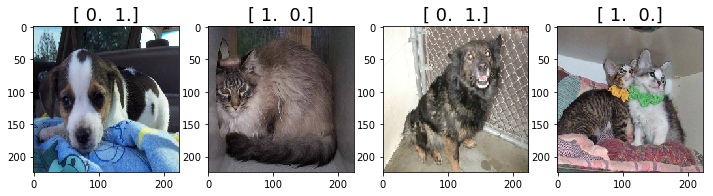

In [43]:
batches = get_batches(train_dir, batch_size=batch_size)
val_batches = get_batches(val_dir, batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

The VGG model returns 1,000 probabilities for each image, representing the probability that the model assigns to each possible imagenet category for each image. By finding the index with the largest probability (with np.argmax()) we can find the predicted label.

In [44]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('{:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [45]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']
First 5 probabilities: [  3.4565e-11   8.4056e-11   8.2269e-11   6.0309e-11   2.2176e-10]

Predictions prob/class: 
0.9146/beagle
0.7999/Persian_cat
0.2360/groenendael
0.2709/tabby
